In [5]:
import numpy as np
import matplotlib.pyplot as plt
import dill
import corner 
import pandas as pd

In [2]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='times')
plt.rcParams["figure.figsize"] = (12,6)
from matplotlib import rc
rc('text', usetex=True*0)

In [60]:
hmc = dill.load(open('../kep51/dt1.0_nw500_ns1500_c4_mcmc.pkl', 'rb')).get_samples()

In [61]:
hmc['ec'] = np.sqrt(hmc['ecc']) * np.cos(hmc['omega'])
hmc['es'] = np.sqrt(hmc['ecc']) * np.sin(hmc['omega'])

In [99]:
hmcsmp = np.r_[[[hmc['mass'][:,i], hmc['period'][:,i], hmc['ec'][:,i], hmc['es'][:,i], hmc['tic'][:,i]] for i in range(3)]].reshape(15, -1).T

In [65]:
np.shape(emc)

(5100, 15)

In [31]:
emc = pd.read_csv("kep51.tsv", comment='#', delimiter='|')

In [32]:
labels = np.array([['m%d'%i, 'P%d'%i, 'ec%d'%i, 'es%d'%i, 'T%d'%i] for i in range(1,4)]).ravel()

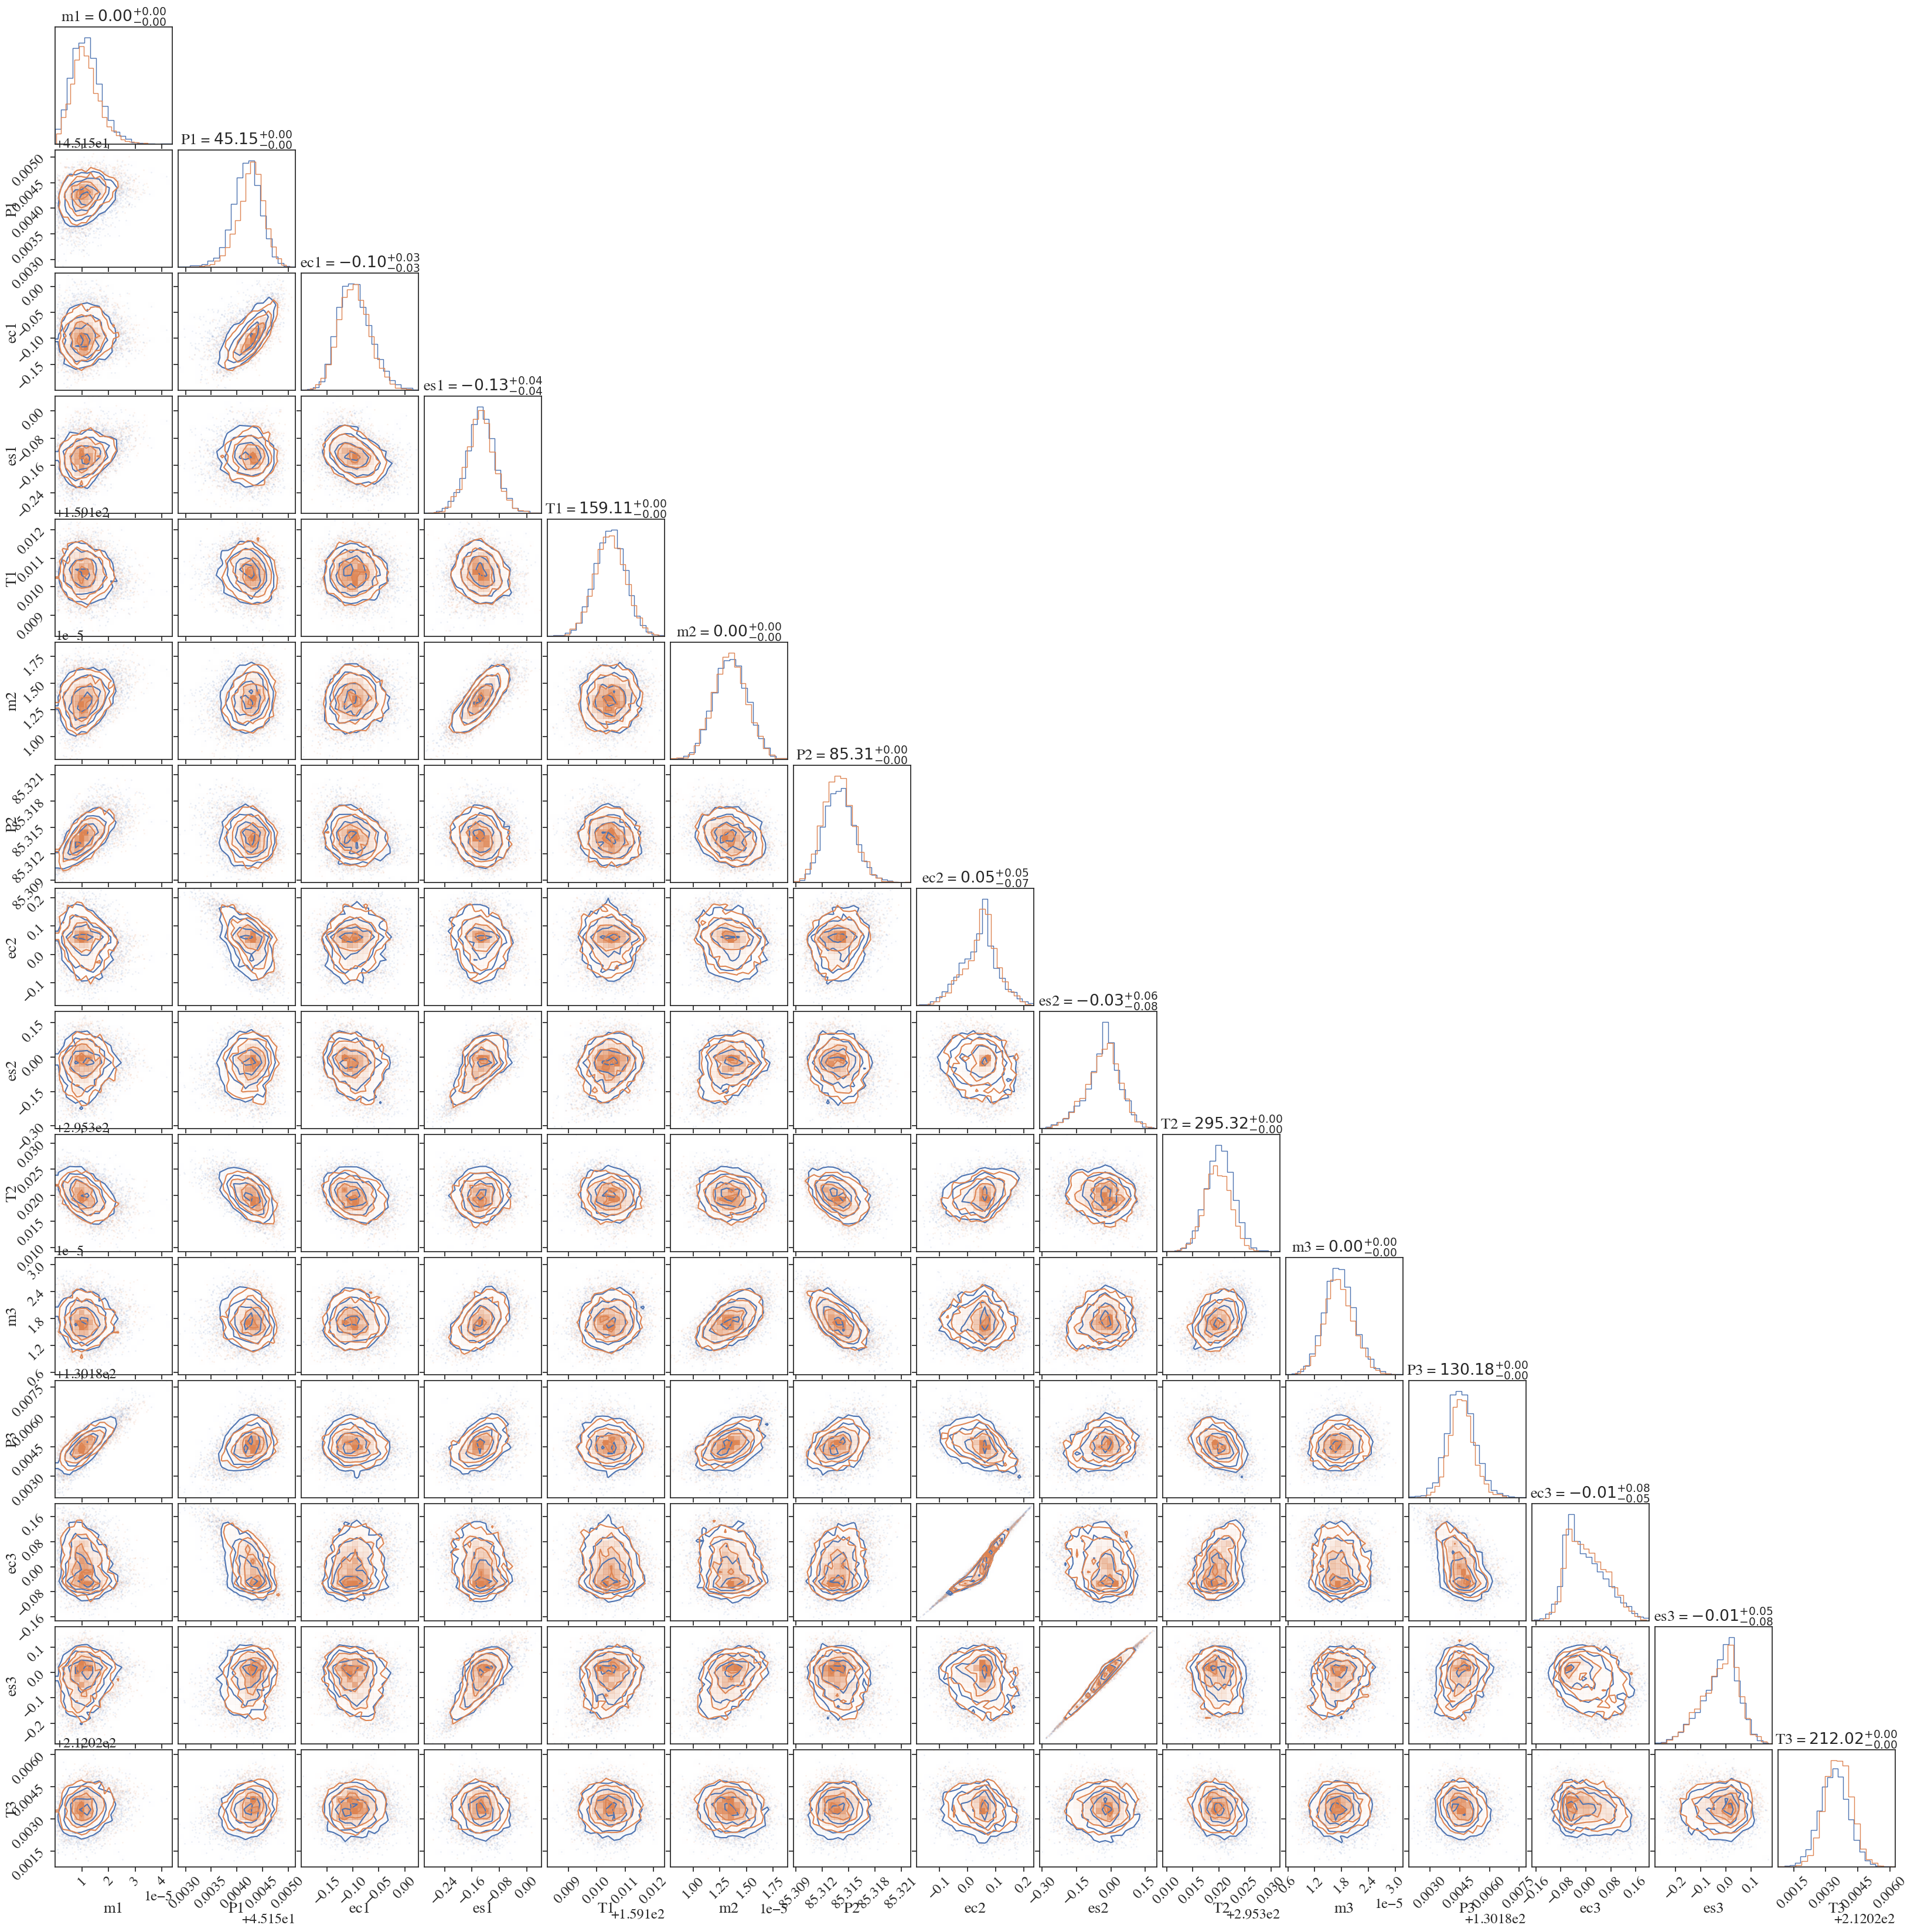

In [109]:
fig_ = corner.corner(emc[:5000], labels=labels, show_titles=True, bins=20, color='C0')
fig = corner.corner(hmcsmp[:5000], fig=fig_, color='C1', bins=20)
plt.savefig("emcee_vs_hmc.png", dpi=200, bbox_inches="tight")